In [2]:
import os 
import numpy as np 
import scipy.stats as ss
import nibabel as nib 
import hcp_utils as hcp 
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns 
import seaborn.objects as so 
from surfplot import Plot

pixdim[1,2,3] should be non-zero; setting 0 dims to 1


In [3]:
dir_path = r'/Users/weiwei/BaiduCloud/Work/Paris/HSV/Revised/data'
rgba_mv = np.load(os.path.join(dir_path, 'rgba_mv_rmRS_167.npy'))
rgba_mv_m = rgba_mv.mean(axis=0)

In [3]:
rgba_mv_grp = rgba_mv_m[:3,:]
rgba_mv_grp_sum = rgba_mv_grp.sum(axis=0)
perc_v = rgba_mv_grp[0,:]/rgba_mv_grp_sum
perc_s = rgba_mv_grp[1,:]/rgba_mv_grp_sum
perc_a = rgba_mv_grp[2,:]/rgba_mv_grp_sum

In [4]:
import v_model_hsv as vmod 
th_ind_mv, rd_ind_mv, th_grp_mv, rd_grp_mv, color_mv = vmod.v_hsv_model_rgba_indiv(rgba_mv)

In [5]:
import matplotlib.colors as color
hsv_grp_mv = color.rgb_to_hsv(color_mv)
hsv_grp_mv[:,1] = 1
rgb_grp_mv = color.hsv_to_rgb(hsv_grp_mv)

In [43]:
import mpltern as mlt 
from matplotlib.patches import ArrowStyle, FancyArrowPatch
plt.rcParams["font.family"] = "Helvetica"

# fig = plt.figure(dpi=150)
# axs = fig.subplots(1,1, subplot_kw={'projection':'ternary'})

def v_ternary_plot(perc_t, perc_l, perc_r, axs, cmap=None, c=None):
    
    # fig.subplots_adjust(left=0.075, right=0.85, wspace=0.3)
    # axs = fig.add_subplot(1, 1, 1, projection="ternary")

    if c is not None:
        axs.scatter(perc_t, perc_l, perc_r, cmap=cmap, c=c, s=0.15, alpha=.1)
    else:
        axs.scatter(perc_t, perc_l, perc_r, c=None, cmap=None, s=0.15, alpha=.1)

    axs.taxis.set_ticks([0,1])
    axs.laxis.set_ticks([0,1])
    axs.raxis.set_ticks([0,1])
    axs.taxis.set_ticklabels(labels = ['0', '100'], fontsize=5)
    axs.laxis.set_ticklabels(labels = ['0', '100'], fontsize=5)
    axs.raxis.set_ticklabels(labels = ['0', '100'], fontsize=5)

    arrowstyle = ArrowStyle('simple', head_length=10, head_width=5)
    kwargs_arrow = {
        'transform': axs.transAxes,  # Used with ``ax.transAxesProjection``
        'arrowstyle': arrowstyle,
        'linewidth': .5,
        'clip_on': False,  # To plot arrows outside triangle
        'zorder': -15,  # Very low value not to hide e.g. tick labels.
    }

    # Start of arrows in barycentric coordinates.
    ta = np.array([ 0.15, -0.10,  0.85])
    la = np.array([ 0.85,  0.15, -0.10])
    ra = np.array([-0.10,  0.85,  0.15])

    # End of arrows in barycentric coordinates.
    tb = np.array([ 0.85, -0.10,  0.15])
    lb = np.array([ 0.15,  0.85, -0.10])
    rb = np.array([-0.10,  0.15,  0.85])

    # This transforms the above barycentric coordinates to the original Axes
    # coordinates. In combination with ``ax.transAxes``, we can plot arrows fixed
    # to the Axes coordinates.
    f = axs.transAxesProjection.transform

    tarrow = FancyArrowPatch(f(ta), f(tb), ec='r', fc='r', **kwargs_arrow)
    larrow = FancyArrowPatch(f(la), f(lb), ec='g', fc='g', **kwargs_arrow)
    rarrow = FancyArrowPatch(f(ra), f(rb), ec='b', fc='b', **kwargs_arrow)
    axs.add_patch(tarrow)
    axs.add_patch(larrow)
    axs.add_patch(rarrow)

    # To put the axis-labels at the positions consistent with the arrows above, it
    # may be better to put the axis-label-text directly as follows rather than
    # using e.g.  ax.set_tlabel.
    kwargs_label = {
        'transform': axs.transTernaryAxes,
        'fontsize' : 6,
        # 'fontweight': 'bold',
        'backgroundcolor': 'w',
        'ha': 'center',
        'va': 'center',
        'rotation_mode': 'anchor',
        'zorder': -9,  # A bit higher on arrows, but still lower than others.
    }

    # Put axis-labels on the midpoints of arrows.
    tpos = (ta + tb) * 0.5
    lpos = (la + lb) * 0.5
    rpos = (ra + rb) * 0.5

    axs.text(*tpos, 'V (%)', color='r', rotation=-60, **kwargs_label)
    axs.text(*lpos, 'S (%)', color='g', rotation= 60, **kwargs_label)
    axs.text(*rpos, 'A (%)', color='b', rotation=  0, **kwargs_label)

    # return fig

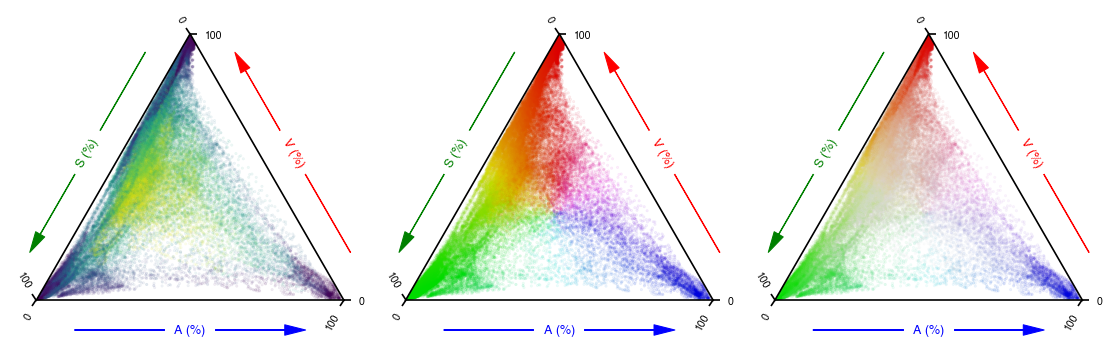

In [44]:
fig = plt.figure(figsize=(9, 3), dpi=150)
# subfigs = fig.subfigures(1, 2, width_ratios=[1, 1], wspace=0.2)
axs = fig.subplots(1,3, subplot_kw={'projection':'ternary'})

v_ternary_plot(perc_v, perc_s, perc_a, axs[0], cmap='viridis_r', c=rd_grp_mv)
v_ternary_plot(perc_v, perc_s, perc_a, axs[1], c=rgb_grp_mv)
v_ternary_plot(perc_v, perc_s, perc_a, axs[2], c=color_mv)

In [5]:
dir_cloud = '/Users/weiwei/BaiduCloud'
dir_surf = dir_cloud + '/Work/Paris/HSV/Surfs'
slh = dir_surf + '/S1200.L.inflated_MSMAll.32k_fs_LR.surf.gii'
srh = dir_surf + '/S1200.R.inflated_MSMAll.32k_fs_LR.surf.gii'
lab_l = nib.load(dir_surf + '/fsLR.32k.L.label.gii').agg_data()
lab_r = nib.load(dir_surf + '/fsLR.32k.R.label.gii').agg_data()
labs  = np.concatenate((lab_l, lab_r))
parc   = hcp.mmp.map_all[hcp.struct.cortex]
yeo7   = hcp.yeo7.map_all[hcp.struct.cortex]
from nilearn import surface
slh_inf = surface.load_surf_mesh(slh)
srh_inf = surface.load_surf_mesh(srh)

In [9]:
plt_mv_rgba = np.zeros((4,32492*2))
plt_mv_rgba[:,labs!=0] = rgba_mv_m

plt_magni = np.zeros(32492*2)
plt_magni[labs!=0] = rd_grp_mv

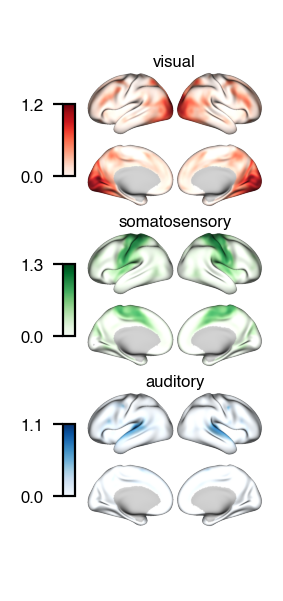

In [31]:
cm = 1/2.54
fig = plt.figure(figsize=(4/2.54, 8/2.54), dpi=200)

axs = [None] * 6
axs[0] = plt.subplot2grid((3, 3), (0, 1), colspan=2, rowspan=1)
axs[1] = plt.subplot2grid((3, 3), (1, 1), colspan=2, rowspan=1)
axs[2] = plt.subplot2grid((3, 3), (2, 1), colspan=2, rowspan=1)
axs[3] = plt.subplot2grid((3, 3), (0, 0), colspan=1, rowspan=1)
axs[4] = plt.subplot2grid((3, 3), (1, 0), colspan=1, rowspan=1)
axs[5] = plt.subplot2grid((3, 3), (2, 0), colspan=1, rowspan=1)

cms = ['Reds', 'Greens', 'Blues']
for i in range(3):
    f = Plot(slh, srh, zoom=1.55, size=(1000, 800), layout='grid', mirror_views=True, views=['lateral','medial'], brightness=0.6)
    add_data = plt_mv_rgba[i,labs!=0]   
    f.add_layer(plt_mv_rgba[i,:], cbar=True, cmap=cms[i], color_range=[np.round(add_data.min(),1), np.round(add_data.max(),1)])
    pr = f.render()
    pr._check_offscreen()
    prm = pr.to_numpy()
    del pr
    axs[i].imshow(prm)
    axs[i].set_xticks([])
    axs[i].set_yticks([])
    axs[i].set_frame_on(False)


for j in range(3):
    add_data = plt_mv_rgba[j,labs!=0]
    cb = fig.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(np.round(add_data.min(),1), np.round(add_data.max(),1)), cmap=cms[j]), ax=axs[j+3], location='left', drawedges=False, aspect=6, 
             orientation='vertical', label='', shrink=.3, anchor=(7,0.5), ticks=[np.round(add_data.min(),1), np.round(add_data.max(),1)])
    cb.ax.set_yticklabels(labels=[str(np.round(add_data.min(),1)), str(np.round(add_data.max(),1))], fontdict={'fontsize':6})
    axs[j+3].set_frame_on(False)
    axs[j+3].set_xticks([])
    axs[j+3].set_yticks([])
fd={'fontsize':6}
axs[0].set_title('visual', fontdict=fd, pad=0)
axs[1].set_title('somatosensory', fontdict=fd, pad=0)
axs[2].set_title('auditory', fontdict=fd, pad=0)

plt.tight_layout(w_pad=-2, h_pad=-3)
# fig.savefig('/Users/weiwei/BaiduCloud/Work/Paris/HSV/Revised/figures/plot/f02/surf_beta.pdf', dpi=1200, transparent=True)

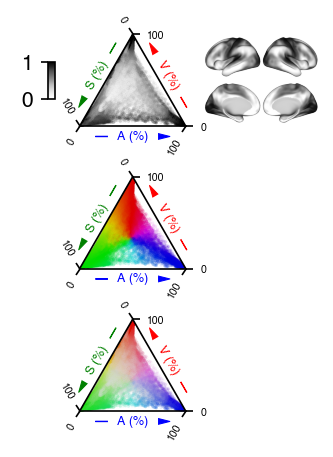

In [73]:
cm = 1/2.54
fig=plt.figure(figsize=(7*cm, 8*cm), dpi=150)
gs = GridSpec(3, 5, figure=fig)

ax_ter_c = fig.add_subplot(gs[0, 0]) 
ax_ter_1 = fig.add_subplot(gs[0, 1:3], projection="ternary") 
ax_ter_2 = fig.add_subplot(gs[1, 1:3], projection="ternary") 
ax_ter_3 = fig.add_subplot(gs[2, 1:3], projection="ternary") 
ax_ter_s = fig.add_subplot(gs[0, 3:])

v_ternary_plot(perc_v, perc_s, perc_a, ax_ter_1, cmap='Greys', c=rd_grp_mv)
v_ternary_plot(perc_v, perc_s, perc_a, ax_ter_2, c=rgb_grp_mv)
v_ternary_plot(perc_v, perc_s, perc_a, ax_ter_3, c=color_mv)
fig.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(0, 1), cmap='Greys'), ax=ax_ter_c, location='left', drawedges=False, aspect=5, 
             orientation='vertical', label='', shrink=.4, anchor=(10,.5), ticks=[0, 1])
ax_ter_c.set_frame_on(False)
ax_ter_c.set_xticks([])
ax_ter_c.set_yticks([])

f = Plot(slh, srh, zoom=1.55, size=(1000, 800), layout='grid', mirror_views=True, views=['lateral','medial'], brightness=0.6)      
f.add_layer(plt_magni, cbar=True, cmap='Greys', color_range=[0,1])
pr = f.render()
pr._check_offscreen()
prm = pr.to_numpy()
del pr
ax_ter_s.imshow(prm)
ax_ter_s.set_xticks([])
ax_ter_s.set_yticks([])
ax_ter_s.set_frame_on(False)

# ax_ter_1.set_title('sensory magnitude/saturation', fontdict={'fontsize':7}, loc='left', pad=2)
# ax_ter_2.set_title('sensory angle/hue', fontdict={'fontsize':7}, loc='left', pad=2)
# ax_ter_3.set_title('sensory integration/hue + saturation + brightness(0.86)', fontdict={'fontsize':7}, loc='left', pad=2)

plt.tight_layout(w_pad=-2, h_pad=0)
fig.savefig('/Users/weiwei/BaiduCloud/Work/Paris/HSV/Revised/figures/plot/f02/ternary.pdf', dpi=1200, transparent=True)

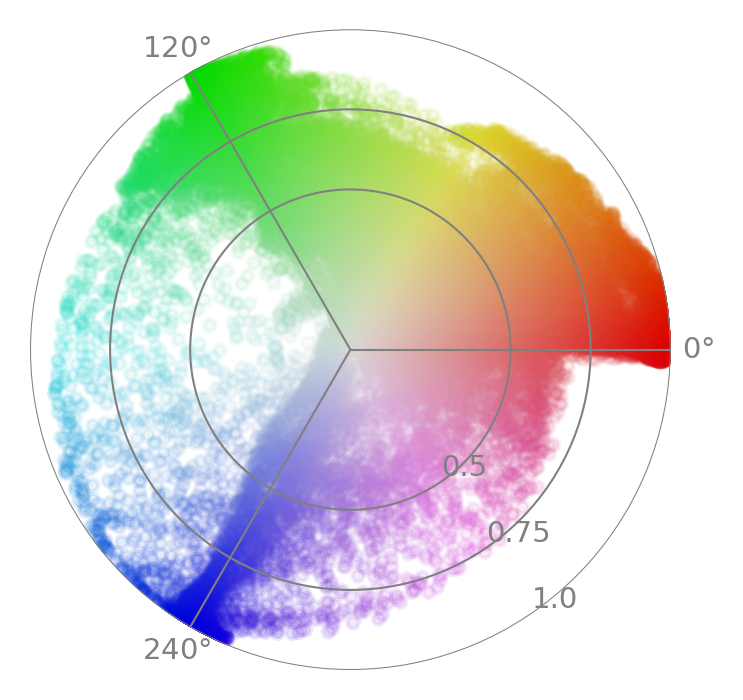

In [7]:
cm = 1/2.54
fig = plt.figure(figsize=(7*cm, 8*cm), dpi=300)
axs = fig.subplots(1,1, subplot_kw={'polar':'True'})

axs.scatter(th_grp_mv, rd_grp_mv, c=color_mv, alpha=.1, s=8)

axs.set_ylim([0,1])
axs.set_xticks([0/360*2*np.pi,120/360*2*np.pi,240/360*2*np.pi])
axs.set_xticklabels(labels=['$0\degree$','$120\degree$','$240\degree$'], fontdict={'fontsize':7, "color":'grey'})
axs.set_yticks([0.5, 0.75, 1])
axs.set_yticklabels(labels=['0.5', '0.75', '1.0'], fontdict={'fontsize':7, "color":'grey'})
axs.set_rlabel_position(-55.5)
axs.tick_params(axis='x', which='major', pad=-4)
axs.grid(linewidth=0.5, color='grey', alpha=1)
axs.spines['polar'].set_visible(False)
# axs.set_title('visual', x=0.5, y=1.01, fontdict={'fontsize':12})
# axs.set_ylabel('Movie-watching', fontdict={'fontsize':13})
fig.savefig('/Users/weiwei/BaiduCloud/Work/Paris/HSV/Revised/figures/plot/f02/polar_final.pdf', transparent=True)

In [10]:
import matplotlib as mpl

def v_surf_plot_32k(surf_lh, surf_rh, face_colors_lh, face_colors_rh, fig_size, 
                    layout_lr, layout_azim, layout_elev,
                    surf_alpha, bg_alpha, bg_darkness):
    
    bg_lh = hcp.mesh.sulc_left
    bg_rh = hcp.mesh.sulc_right

    coordL, facesL = surf_lh
    coordR, facesR = surf_rh

    facesL = np.array(facesL, dtype=int)
    facesR = np.array(facesR, dtype=int)

    limits = [np.min((coordL.min(), coordR.min())), np.max((coordL.max(), coordR.max()))]

    # set colors
    face_colors_lh[:,3] = surf_alpha
    face_colors_rh[:,3] = surf_alpha

    bg_faces_lh = np.mean(bg_lh.copy()[facesL], axis=1)
    bg_vmin_lh, bg_vmax_lh = np.min(bg_faces_lh), np.max(bg_faces_lh)
    if (bg_vmin_lh < 0 or bg_vmax_lh > 1):
        bg_norm_lh = mpl.colors.Normalize(vmin=bg_vmin_lh, vmax=bg_vmax_lh)
        bg_faces_lh = bg_norm_lh(bg_faces_lh)
    # bg_faces_lh *= bg_darkness 
    bg_faces_color_lh = plt.cm.gray_r(bg_faces_lh)
    bg_faces_color_lh[:, :3] *= bg_darkness
    bg_faces_color_lh[:,  3] = bg_alpha

    bg_faces_rh = np.mean(bg_rh.copy()[facesR], axis=1)
    bg_vmin_rh, bg_vmax_rh = np.min(bg_faces_rh), np.max(bg_faces_rh)
    if (bg_vmin_rh < 0 or bg_vmax_rh > 1):
        bg_norm_rh = mpl.colors.Normalize(vmin=bg_vmin_rh, vmax=bg_vmax_rh)
        bg_faces_rh = bg_norm_rh(bg_faces_rh)
    # bg_faces_rh *= bg_darkness 
    bg_faces_color_rh = plt.cm.gray_r(bg_faces_rh)
    bg_faces_color_rh[:, :3] *= bg_darkness
    bg_faces_color_rh[:,  3] = bg_alpha

    mix_lh = np.empty_like(face_colors_lh)
    mix_lh[:, 3] = 1 - (1 - face_colors_lh[:,3]) * (1 - bg_faces_color_lh[:,3])
    for color_index in range(0, 3):
        mix_lh[:, color_index] = (
            face_colors_lh[:, color_index] * face_colors_lh[:, 3]
            + bg_faces_color_lh[:, color_index] * bg_faces_color_lh[:, 3] * (1 - face_colors_lh[:, 3])
        ) / mix_lh[:, 3]

    mix_rh = np.empty_like(face_colors_rh)
    mix_rh[:, 3] = 1 - (1 - face_colors_rh[:,3]) * (1 - bg_faces_color_rh[:,3])
    for color_index in range(0, 3):
        mix_rh[:, color_index] = (
            face_colors_rh[:, color_index] * face_colors_rh[:, 3]
            + bg_faces_color_rh[:, color_index] * bg_faces_color_rh[:, 3] * (1 - face_colors_rh[:, 3])
        ) / mix_rh[:, 3]

    
    # masking figure
    fig = plt.figure(figsize=fig_size)
    num_subplot = len(layout_lr)

    for i in range(num_subplot):
        axs = fig.add_subplot(1,num_subplot,i+1, projection='3d')
        axs.grid(False)
        axs.set_xlim(*limits)
        axs.set_ylim(*limits)
        axs.set_box_aspect(aspect=(0.5, 1.3, 0.9))
        axs.view_init(elev=layout_elev[i], azim=layout_azim[i])
        axs.set_axis_off()

        if layout_lr[i] == 'lh':
            coords = coordL.copy()
            faces  = facesL.copy()
            faces_color = mix_lh.copy()
        else:
            coords = coordR.copy()
            faces  = facesR.copy()
            faces_color = mix_rh.copy() 

        p3d = axs.plot_trisurf(coords[:, 0], coords[:, 1], coords[:, 2],
                            triangles=faces, linewidth=0., 
                            antialiased=False)
        p3d.set_facecolors(faces_color)

    fig.tight_layout()

    return fig 

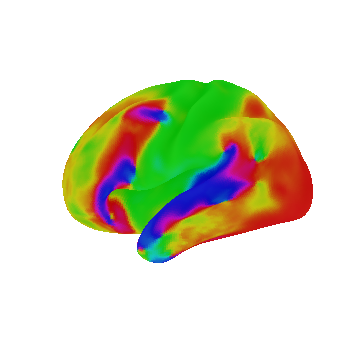

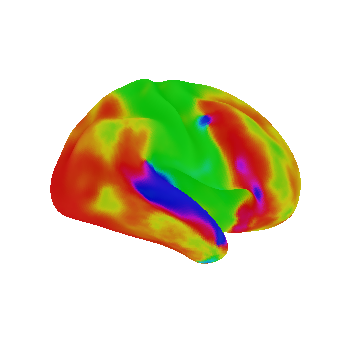

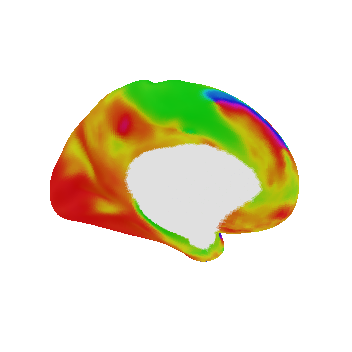

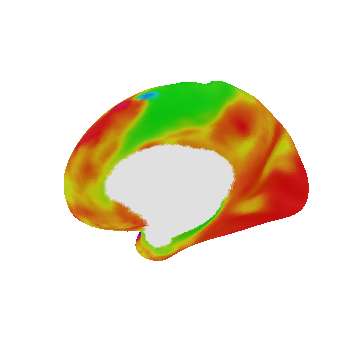

In [11]:
color_surf_mv = np.ones((32492*2, 3))
color_surf_mv[labs!=0,:] = rgb_grp_mv
color_surf_mv_lh = color_surf_mv[:32492,:]
color_surf_mv_rh = color_surf_mv[32492:,:]

color_faces_mv_lh = np.mean(color_surf_mv_lh[hcp.mesh.inflated_left[1]], axis=1)
color_faces_mv_rh = np.mean(color_surf_mv_rh[hcp.mesh.inflated_right[1]], axis=1)

color_faces_mv_L = np.ones((color_faces_mv_lh.shape[0], 4))
color_faces_mv_L[:,:3] = color_faces_mv_lh

color_faces_mv_R = np.ones((color_faces_mv_rh.shape[0], 4))
color_faces_mv_R[:,:3] = color_faces_mv_rh

f1=v_surf_plot_32k(surf_lh=slh_inf, surf_rh=srh_inf, 
                face_colors_lh=color_faces_mv_L.copy(), face_colors_rh=color_faces_mv_R.copy(), fig_size=(5,5), 
                layout_lr=['lh'], layout_azim=[180], layout_elev=[0],
                surf_alpha=0.8, bg_alpha=0.9, bg_darkness=0.6)
f2=v_surf_plot_32k(surf_lh=slh_inf, surf_rh=srh_inf, 
                face_colors_lh=color_faces_mv_L.copy(), face_colors_rh=color_faces_mv_R.copy(), fig_size=(5,5), 
                layout_lr=['rh'], layout_azim=[0], layout_elev=[0],
                surf_alpha=0.8, bg_alpha=0.9, bg_darkness=0.6)
f3=v_surf_plot_32k(surf_lh=slh_inf, surf_rh=srh_inf, 
                face_colors_lh=color_faces_mv_L.copy(), face_colors_rh=color_faces_mv_R.copy(), fig_size=(5,5), 
                layout_lr=['lh'], layout_azim=[0], layout_elev=[0],
                surf_alpha=0.8, bg_alpha=0.9, bg_darkness=0.6)
f4=v_surf_plot_32k(surf_lh=slh_inf, surf_rh=srh_inf, 
                face_colors_lh=color_faces_mv_L.copy(), face_colors_rh=color_faces_mv_R.copy(), fig_size=(5,5), 
                layout_lr=['rh'], layout_azim=[180], layout_elev=[0],
                surf_alpha=0.8, bg_alpha=0.9, bg_darkness=0.6)
f1.savefig('/Users/weiwei/BaiduCloud/Work/Paris/HSV/Revised/figures/plot/f02/surf_mv_hue_lateral_lh.png', transparent='True',dpi=1200)
f2.savefig('/Users/weiwei/BaiduCloud/Work/Paris/HSV/Revised/figures/plot/f02/surf_mv_hue_lateral_rh.png', transparent='True',dpi=1200)
f3.savefig('/Users/weiwei/BaiduCloud/Work/Paris/HSV/Revised/figures/plot/f02/surf_mv_hue_medial_lh.png', transparent='True',dpi=1200)
f4.savefig('/Users/weiwei/BaiduCloud/Work/Paris/HSV/Revised/figures/plot/f02/surf_mv_hue_medial_rh.png', transparent='True',dpi=1200)

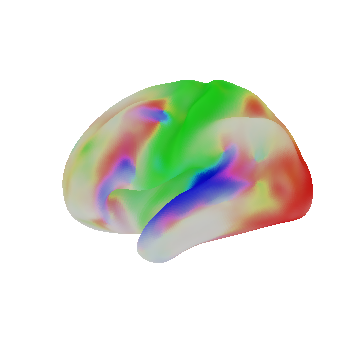

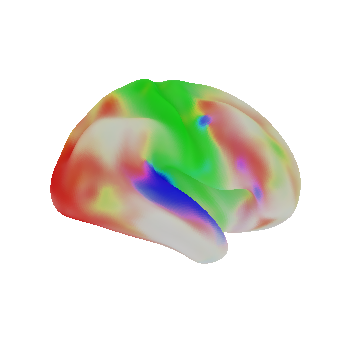

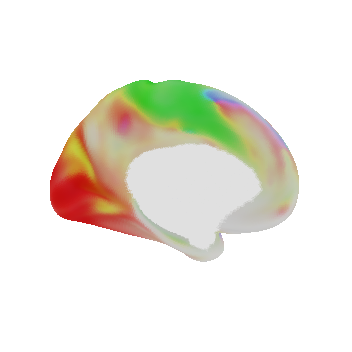

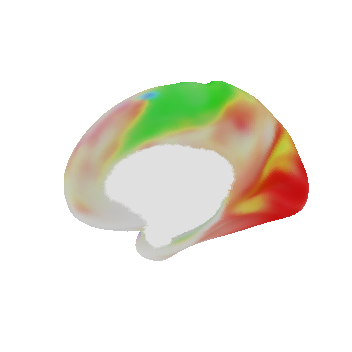

In [22]:
color_surf_mv = np.ones((32492*2, 3))
color_surf_mv[labs!=0,:] = color_mv
color_surf_mv_lh = color_surf_mv[:32492,:]
color_surf_mv_rh = color_surf_mv[32492:,:]

color_faces_mv_lh = np.mean(color_surf_mv_lh[hcp.mesh.inflated_left[1]], axis=1)
color_faces_mv_rh = np.mean(color_surf_mv_rh[hcp.mesh.inflated_right[1]], axis=1)

color_faces_mv_L = np.ones((color_faces_mv_lh.shape[0], 4))
color_faces_mv_L[:,:3] = color_faces_mv_lh

color_faces_mv_R = np.ones((color_faces_mv_rh.shape[0], 4))
color_faces_mv_R[:,:3] = color_faces_mv_rh

f1=v_surf_plot_32k(surf_lh=slh_inf, surf_rh=srh_inf, 
                face_colors_lh=color_faces_mv_L.copy(), face_colors_rh=color_faces_mv_R.copy(), fig_size=(5,5), 
                layout_lr=['lh'], layout_azim=[180], layout_elev=[0],
                surf_alpha=0.8, bg_alpha=0.9, bg_darkness=0.6)
f2=v_surf_plot_32k(surf_lh=slh_inf, surf_rh=srh_inf, 
                face_colors_lh=color_faces_mv_L.copy(), face_colors_rh=color_faces_mv_R.copy(), fig_size=(5,5), 
                layout_lr=['rh'], layout_azim=[0], layout_elev=[0],
                surf_alpha=0.8, bg_alpha=0.9, bg_darkness=0.6)
f3=v_surf_plot_32k(surf_lh=slh_inf, surf_rh=srh_inf, 
                face_colors_lh=color_faces_mv_L.copy(), face_colors_rh=color_faces_mv_R.copy(), fig_size=(5,5), 
                layout_lr=['lh'], layout_azim=[0], layout_elev=[0],
                surf_alpha=0.8, bg_alpha=0.9, bg_darkness=0.6)
f4=v_surf_plot_32k(surf_lh=slh_inf, surf_rh=srh_inf, 
                face_colors_lh=color_faces_mv_L.copy(), face_colors_rh=color_faces_mv_R.copy(), fig_size=(5,5), 
                layout_lr=['rh'], layout_azim=[180], layout_elev=[0],
                surf_alpha=0.8, bg_alpha=0.9, bg_darkness=0.6)
f1.savefig('/Users/weiwei/BaiduCloud/Work/Paris/HSV/Revised/figures/plot/f02/surf_mv_lateral_lh.png', transparent='True',dpi=1200)
f2.savefig('/Users/weiwei/BaiduCloud/Work/Paris/HSV/Revised/figures/plot/f02/surf_mv_lateral_rh.png', transparent='True',dpi=1200)
f3.savefig('/Users/weiwei/BaiduCloud/Work/Paris/HSV/Revised/figures/plot/f02/surf_mv_medial_lh.png', transparent='True',dpi=1200)
f4.savefig('/Users/weiwei/BaiduCloud/Work/Paris/HSV/Revised/figures/plot/f02/surf_mv_medial_rh.png', transparent='True',dpi=1200)

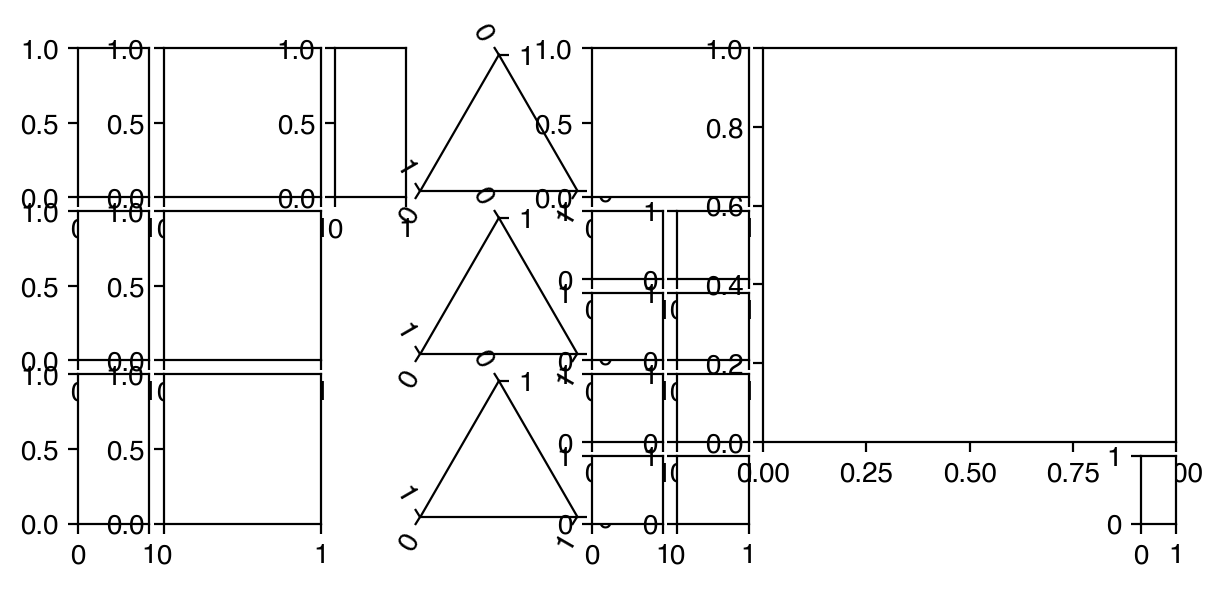

In [36]:
from matplotlib.gridspec import GridSpec

cm = 1/2.54
fig=plt.figure(figsize=(18*cm, 8*cm), dpi=200)
gs = GridSpec(6, 13, figure=fig)

# surf betas colorbar
ax_sbc = [None]*3
ax_sbc[0] = fig.add_subplot(gs[0:2, 0])
ax_sbc[1] = fig.add_subplot(gs[2:4, 0])
ax_sbc[2] = fig.add_subplot(gs[4:6, 0])

# surf beta
ax_sb = [None]*3
ax_sb[0] = fig.add_subplot(gs[0:2, 1:3]) 
ax_sb[1] = fig.add_subplot(gs[2:4, 1:3]) 
ax_sb[2] = fig.add_subplot(gs[4:6, 1:3]) 

# ternary plots
ax_ter_c= fig.add_subplot(gs[0:2, 3]) 
ax_ter_1 = fig.add_subplot(gs[0:2, 4:6], projection="ternary") 
ax_ter_2 = fig.add_subplot(gs[2:4, 4:6], projection="ternary") 
ax_ter_3 = fig.add_subplot(gs[4:6, 4:6], projection="ternary") 

# surf mapping of ternary plots
axM = fig.add_subplot(gs[0:2, 6:8]) 

axH1 = fig.add_subplot(gs[2, 6]) 
axH2 = fig.add_subplot(gs[2, 7])
axH3 = fig.add_subplot(gs[3, 6])
axH4 = fig.add_subplot(gs[3, 7])

axI1 = fig.add_subplot(gs[4, 6]) 
axI2 = fig.add_subplot(gs[4, 7]) 
axI3 = fig.add_subplot(gs[5, 6]) 
axI4 = fig.add_subplot(gs[5, 7]) 

axv  = fig.add_subplot(gs[0:5, 8:14])
gsnew = GridSpec(6, 26, figure=fig) 
axt = fig.add_subplot(gsnew[5, -1]) 

# plt.show()

In [37]:
cms = ['Reds', 'Greens', 'Blues']
for i in range(3):
    f = Plot(slh, srh, zoom=1.55, size=(1000, 800), layout='grid', mirror_views=True, views=['lateral','medial'], brightness=0.6)
    add_data = plt_mv_rgba[i,labs!=0]   
    f.add_layer(plt_mv_rgba[i,:], cbar=True, cmap=cms[i], color_range=[np.round(add_data.min(),1), np.round(add_data.max(),1)])
    pr = f.render()
    pr._check_offscreen()
    prm = pr.to_numpy()
    del pr
    ax_sb[i].imshow(prm)
    ax_sb[i].set_xticks([])
    ax_sb[i].set_yticks([])
    ax_sb[i].set_frame_on(False)
fd={'fontsize':6}
ax_sb[0].set_title('visual', fontdict=fd, pad=0)
ax_sb[1].set_title('somatosensory', fontdict=fd, pad=0)
ax_sb[2].set_title('auditory', fontdict=fd, pad=0)

for j in range(3):
    add_data = plt_mv_rgba[j,labs!=0]
    fig.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(np.round(add_data.min(),1), np.round(add_data.max(),1)), cmap=cms[j]), ax=ax_sbc[j], location='left', drawedges=False, aspect=6, 
             orientation='vertical', label='', shrink=.3, anchor=(7,0.5), ticks=[np.round(add_data.min(),1), np.round(add_data.max(),1)])
    ax_sbc[j].set_frame_on(False)
    ax_sbc[j].set_xticks([])
    ax_sbc[j].set_yticks([])

v_ternary_plot(perc_v, perc_s, perc_a, ax_ter_1, cmap='viridis_r', c=rd_grp_mv)
v_ternary_plot(perc_v, perc_s, perc_a, ax_ter_2, c=rgb_grp_mv)
v_ternary_plot(perc_v, perc_s, perc_a, ax_ter_3, c=color_mv)
fig.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(0, 1), cmap='viridis_r'), ax=ax_ter_c, location='left', drawedges=False, aspect=6, 
             orientation='vertical', label='', shrink=.3, anchor=(12,0.5), ticks=[0, 1])
ax_ter_c.set_frame_on(False)
ax_ter_c.set_xticks([])
ax_ter_c.set_yticks([])

f = Plot(slh, srh, zoom=1.55, size=(1000, 800), layout='grid', mirror_views=True, views=['lateral','medial'], brightness=0.6)      
f.add_layer(plt_magni, cbar=True, cmap='viridis_r', color_range=[0,1])
pr = f.render()
pr._check_offscreen()
prm = pr.to_numpy()
del pr
axM.imshow(prm)
axM.set_xticks([])
axM.set_yticks([])
axM.set_frame_on(False)

In [25]:
# H1=plt.imread('/Users/weiwei/BaiduCloud/Work/Paris/HSV/Revised/figures/plot/f02/surf_mv_hue_lateral_lh.png')
# H2=plt.imread('/Users/weiwei/BaiduCloud/Work/Paris/HSV/Revised/figures/plot/f02/surf_mv_hue_lateral_rh.png')
# H3=plt.imread('/Users/weiwei/BaiduCloud/Work/Paris/HSV/Revised/figures/plot/f02/surf_mv_hue_medial_lh.png')
# H4=plt.imread('/Users/weiwei/BaiduCloud/Work/Paris/HSV/Revised/figures/plot/f02/surf_mv_hue_medial_rh.png')
# axH1.imshow(H1, aspect='auto')
# axH2.imshow(H2)
# axH3.imshow(H3, aspect=.5)
# axH4.imshow(H4)
# for i in range(4):
#     exec("axH"+str(i+1)+".set_xticks([])")
#     exec("axH"+str(i+1)+".set_yticks([])")
#     exec("axH"+str(i+1)+".set_frame_on(False)")

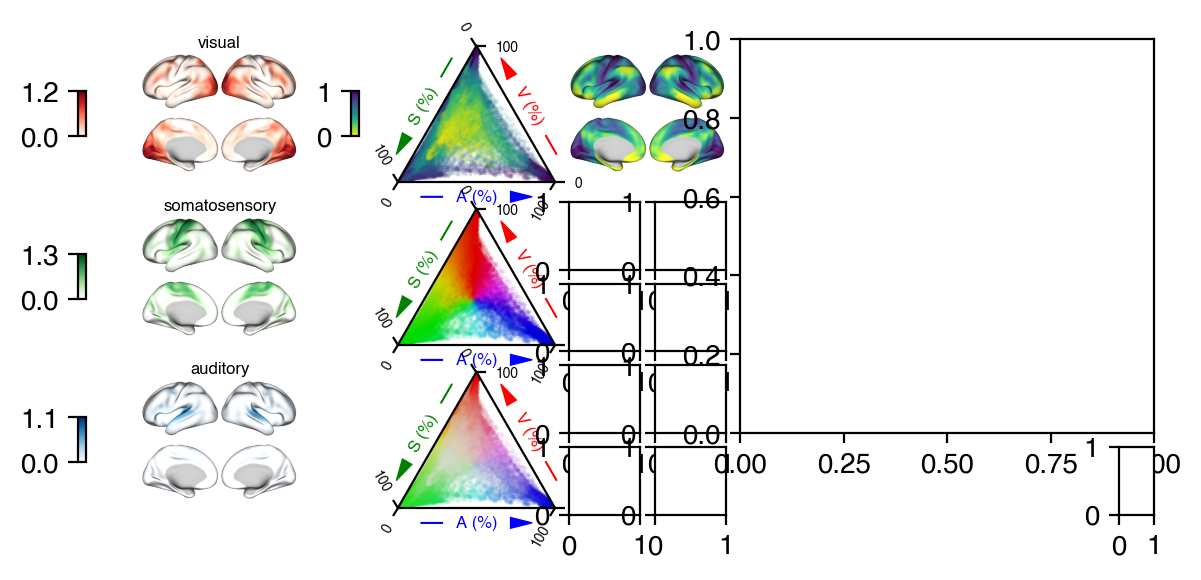

<Figure size 432x288 with 0 Axes>

In [40]:



plt.tight_layout(w_pad=0, h_pad=5)
fig

In [26]:
exec("print('a')")

a
